# Gionoma groei na chirugie


Voor deze week:
- the column namen veranderen om het makkelijker te maken om mee te werken [1] 4 minuten
- uitzoeken of het handiger is om 3 df te maken of kijken of de data in 1 df kan [2] 40 minuten misschien 2
- aan het einde alle data processing daarin zetten [1] 1 minuten
- de rest van univaat afmaken [1] 60 minuten
- bivariaat maken [1] 100 minuten
intotaal 4 uur en 50 min

Komende 2 weken:
- multivariaat maken[optioneel]
- modelen kiezen
- modelen trainen
- feature selection
- modelen evalueren
- model kiezen en laten zien hoe geweldig hij is
- conclusie schrijven

We beginnen met de data leren kennen dit doen we aan de hand van een EDA

In [136]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [137]:
# df met alle gegevens
# welke data heb ik allemaall gedownload en wat kan ik er wel en niet mee beantwoorden

___

## Data loading

___

## EDA

## Data processing

The next code is to change the data based on what issues were found while doing the data analysis. In this way it wont be scattert all over the data analysis code. 

___

## Univariaat

Dit is een document met wat basis informatie over alle patiënten.
- hoeveel patienten
- histogram of iets voor de overlevingstijd, age at surgery, MGMT quantitative
- de hoeveelheid man en vrouw in een bar plot, IDH, IDH method, MGMT qualitative

In [138]:
df_pathology = pd.read_csv("LUMIERE-Demographics_Pathology.csv")
df_pathology

,Patient,Survival time (weeks),Sex,Age at surgery (years),IDH (WT: wild type),IDH method,MGMT qualitative,MGMT quantitative
0,Patient-001,89,female,57,WT,BES,methylated,na
1,Patient-002,48,female,71,na,na,not methylated,0.00%
2,Patient-003,40,male,39,WT,Immuno,not methylated,0.00%
3,Patient-004,110,male,69,WT,Sanger Sequencing,not methylated,0.00%
4,Patient-005,53,male,66,WT,Immuno,not methylated,0.00%
...,...,...,...,...,...,...,...,...
86,Patient-087,77,male,64,na,na,not methylated,0.00%
87,Patient-088,58,male,73,WT,Immuno,not methylated,0.00%
88,Patient-089,82,female,57,WT,BES,methylated,na
89,Patient-090,50,female,74,WT,Immuno,not methylated,0.00%


Dit is een overzicht van alle mogelijke kollomen met wat inzicht over wat er in het bestand zit.

In [139]:
df_pathology.nunique()

Patient                   91
Survival time (weeks)     65
Sex                        2
Age at surgery (years)    37
IDH (WT: wild type)        5
IDH method                 4
MGMT qualitative           3
MGMT quantitative         19
dtype: int64

In [140]:
df_pathology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Patient                 91 non-null     object
 1   Survival time (weeks)   91 non-null     object
 2   Sex                     91 non-null     object
 3   Age at surgery (years)  91 non-null     int64 
 4   IDH (WT: wild type)     91 non-null     object
 5   IDH method              91 non-null     object
 6   MGMT qualitative        91 non-null     object
 7   MGMT quantitative       91 non-null     object
dtypes: int64(1), object(7)
memory usage: 5.8+ KB


Uit de bovenste 2 code chunks is veel informatie over de structuur van de data, om het overzichtelijk te houden is het in een table hieronder samengevat:
dingen die aangepast moeten worden volgens de resultaten is dat de overlevings weken na de operatie een category is door dat het een string is terwijl het een int of float moet zijn. hetzelfde met MGMT quantitative. Bij de aanpassing wordt rekening gehouden met "na" waarden. 
intotaal zitten er 91 patiënten in de data

In [141]:
# Omzetten van strings naar numerieke waarden
listy = []
for j in df_pathology["MGMT quantitative"]:
    if j == 'na':
        listy.append(np.nan)
    else:
        j = j.split("%")[0]
        listy.append(float(j))

df_pathology["MGMT quantitative"] = listy
df_pathology["Survival time (weeks)"] = pd.to_numeric(df_pathology["Survival time (weeks)"], errors='coerce')
df_pathology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient                 91 non-null     object 
 1   Survival time (weeks)   86 non-null     float64
 2   Sex                     91 non-null     object 
 3   Age at surgery (years)  91 non-null     int64  
 4   IDH (WT: wild type)     91 non-null     object 
 5   IDH method              91 non-null     object 
 6   MGMT qualitative        91 non-null     object 
 7   MGMT quantitative       64 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 5.8+ KB


In [142]:
codebook={
    "attribute": ['Patient_number', 'Survival_time', 'Sex', 'Age at surgery', 'IDH', 'IDH method', 'MGMT qualitative', 'MGMT quantitative'],
    "unit": ["n.a.", "weeks.", "n.a.", "years", "n.a.", "n.a.", "n.a.", "%"],
    "dtype": ["category", "float64", "category", "int64", "catergory", "catergory", "category", "float64"],
    "description": [
        "Patient number for anonomisty", 
        "Amount of weeks the patient survived after surgery", 
        "The sex of the patient", 
        "The age the patient was when the surgery was preformed", 
        "Tells if the patient has the wild type or a mutation of the Isocitrate DeHydrogenase gene", 
        "What method was used for identifying IDH", 
        "If the O6-methylguanine-DNA-methyltransferase(MGMT) was in a methylated, non-methylated or unknown state",
        "The percentage of the MGMT gene that was methylated"
    ]
}
pd.DataFrame(codebook).set_index("attribute")

,unit,dtype,description
attribute,,,
Patient_number,n.a.,category,Patient number for anonomisty
Survival_time,weeks.,float64,Amount of weeks the patient survived after sur...
Sex,n.a.,category,The sex of the patient
Age at surgery,years,int64,The age the patient was when the surgery was p...
IDH,n.a.,catergory,Tells if the patient has the wild type or a mu...
IDH method,n.a.,catergory,What method was used for identifying IDH
MGMT qualitative,n.a.,category,If the O6-methylguanine-DNA-methyltransferase(...
MGMT quantitative,%,float64,The percentage of the MGMT gene that was methy...


Wat is de MGMT gen?  
MGMT (O6-methylguanine-DNA-methyltransferase) is een tumor-supressor gen dat de reparatie van DNA-schade reguleert. Het gen is geïdentificeerd als een belangrijk gen in de behandeling van glioblastoom, een agressieve vorm van hersentumor. De MGMT-methylaase is een enzym dat DNA-methyltransferase-functie heeft, waardoor het DNA beschadigingen kan repareren. Wanneer het MGMT-gen wordt uitgeschakeld, kan het DNA niet worden gerepareerd, wat kan leiden tot genetische mutaties en tumorontwikkeling.

De volgende code is om een overzicht te krijgen van hoe de numerieke data is verdeeld:

In [143]:
df_pathology.describe()

,Survival time (weeks),Age at surgery (years),MGMT quantitative
count,86.000000,91.000000,64.000000
mean,83.395349,62.197802,25.593750
std,47.409674,10.340019,39.182406
min,3.000000,39.000000,0.000000
25%,50.000000,54.500000,0.000000
50%,72.500000,63.000000,0.000000
75%,116.750000,70.500000,73.500000
max,201.000000,80.000000,100.000000


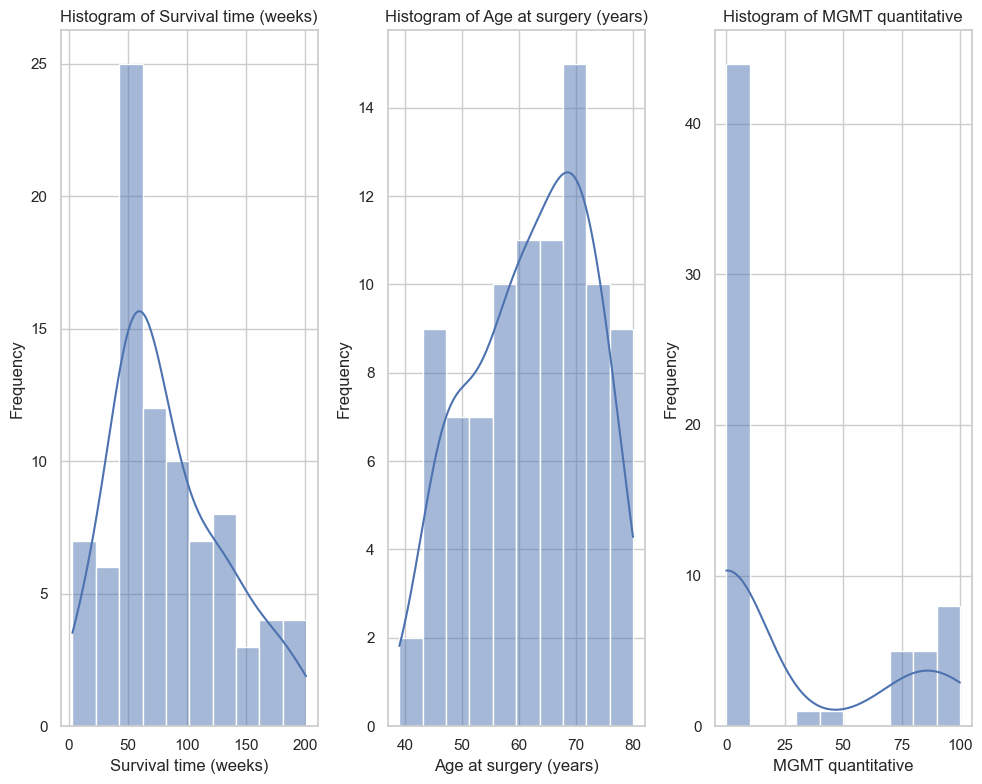

In [144]:
# violin plot or histogram of the data
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 8))

list_columns = ['Survival time (weeks)', 'Age at surgery (years)', 'MGMT quantitative']
for i, column in enumerate(list_columns):
    sns.histplot(data=df_pathology, x=column, ax=axes[i], kde=True, bins=10)
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

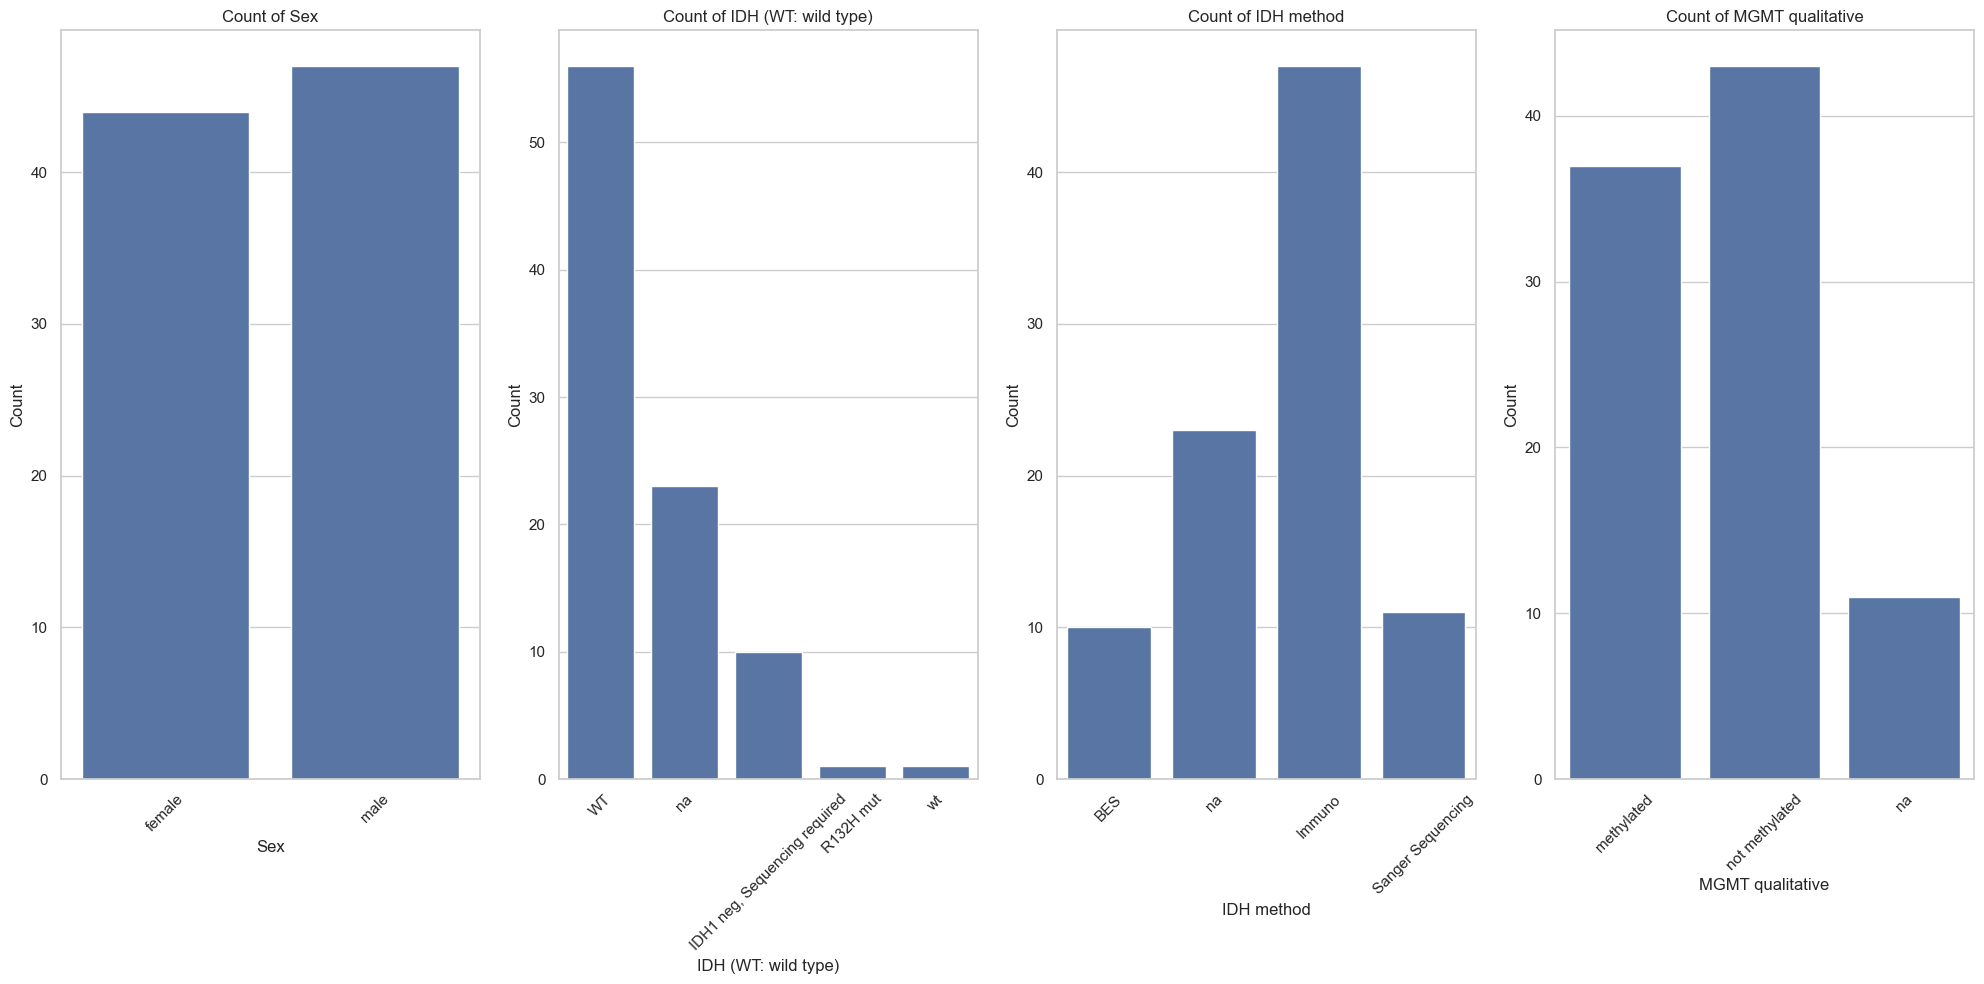

In [145]:
# barplots for Sex, IDH (WT: wild type), IDH method, MGMT qualitative
# grid of 2 by 2
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))

list_columns = ['Sex', 'IDH (WT: wild type)', 'IDH method', 'MGMT qualitative']
for i, column in enumerate(list_columns):
    sns.countplot(data=df_pathology, x=column, ax=axes[i])
    axes[i].set_title(f'Count of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### hier is ook in te zien dat er een paar WT inzitten maar en kleine letters hebben even omzetten naar hoofdletters dus.
#### IDH1 staat een beetje raar 

___

### volgende dataset

- een histogram met week nummers om te bekijken hoeveel overal van bestaat
- een barplot voor Rating, Rating rationale, lessTha3Months, NonMeasurableLesions
- de data die nan is of np.nan van maken of 0 en 1, week data naar ints omzetten misschien ook bij patient

In [146]:
df_rating = pd.read_csv("LUMIERE-ExpertRating-v202211.csv")
df_rating

,Patient,Date,LessThan3Months,NonMeasurableLesions,"Rating (according to RANO, PD: Progressive disease, SD: Stable disease, PR: Partial response, CR: Complete response, Pre-Op: Pre-Operative, Post-Op: Post-Operative)","Rating rationale (CRET: complete resection of the enhancing tumor, PRET: partial resection of the enhancing tumor, T2-Progr.: T2-Progression, L: Lesion)"
0,Patient-001,week-000-1,NaN,NaN,Pre-Op,NaN
1,Patient-001,week-000-2,NaN,NaN,Post-Op,CRET
2,Patient-001,week-044,NaN,NaN,SD,NaN
3,Patient-001,week-056,NaN,x,PD,"Target L.: 1 12mm x 13mm, new non-target L."
4,Patient-002,week-000,NaN,NaN,Pre-Op,NaN
...,...,...,...,...,...,...
611,Patient-091,week-001,NaN,NaN,Post-Op,PRET
612,Patient-091,week-014,NaN,x,PD,Non-measurable L.
613,Patient-091,week-026,NaN,x,PD,Non-measurable L.
614,Patient-091,week-036,NaN,x,PD,Non-measurable L.


In [147]:
df_rating.nunique()

Patient                                                                                                                                                                  91
Date                                                                                                                                                                    159
LessThan3Months                                                                                                                                                           1
NonMeasurableLesions                                                                                                                                                      1
Rating (according to RANO, PD: Progressive disease, SD: Stable disease, PR: Partial response, CR: Complete response, Pre-Op: Pre-Operative, Post-Op: Post-Operative)      8
Rating rationale (CRET: complete resection of the enhancing tumor, PRET: partial resection of the enhancing tumor, T2-Progr.: T2-Progression

Hieruit wordt duidelijk dat LessThan3Months en NonMeasurableLesions allebei maar 1 waarde heeft namelijk x daarnaast ook NaN maar die wordt niet mee geteld in de count() functie, dus hij moet eigenlijk 2 terug geven het is een mogelijkheid om de waarden te veranderen naar 0 en 1 voor false en true.

In [148]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 6 columns):
 #   Column                                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                                --------------  ----- 
 0   Patient                                                                                                                                                               616 non-null    object
 1   Date                                                                                                                                                                  616 non-null    object
 2   LessThan3Months                                                                                                    

#### explain the found issues and the proposed solutions
The analysis of the system revealed several issues that need to be addressed. The first issue is that the column names are way to long and the next is that 2 and 3 are not numeric. The proposed solution is to shorten the column names and to convert the non-numeric values to numeric values. Instead of nan and x will be 0 and 1 respectively.

In [149]:
### codebook


In [150]:
# data processing
# non-num to num
df_rating["LessThan3Months"] = df_rating["LessThan3Months"].apply(lambda x: 1 if x == "x" else 0)
df_rating["NonMeasurableLesions"] = df_rating["NonMeasurableLesions"].apply(lambda x: 1 if x == "x" else 0)

# replace column names
df_rating.columns = ["Patient", "Date", "LessThan3Months", "NonMeasurableLesions", "Rating", "Rationale_rating"]

df_rating

,Patient,Date,LessThan3Months,NonMeasurableLesions,Rating,Rationale_rating
0,Patient-001,week-000-1,0,0,Pre-Op,NaN
1,Patient-001,week-000-2,0,0,Post-Op,CRET
2,Patient-001,week-044,0,0,SD,NaN
3,Patient-001,week-056,0,1,PD,"Target L.: 1 12mm x 13mm, new non-target L."
4,Patient-002,week-000,0,0,Pre-Op,NaN
...,...,...,...,...,...,...
611,Patient-091,week-001,0,0,Post-Op,PRET
612,Patient-091,week-014,0,1,PD,Non-measurable L.
613,Patient-091,week-026,0,1,PD,Non-measurable L.
614,Patient-091,week-036,0,1,PD,Non-measurable L.


### Visualizations

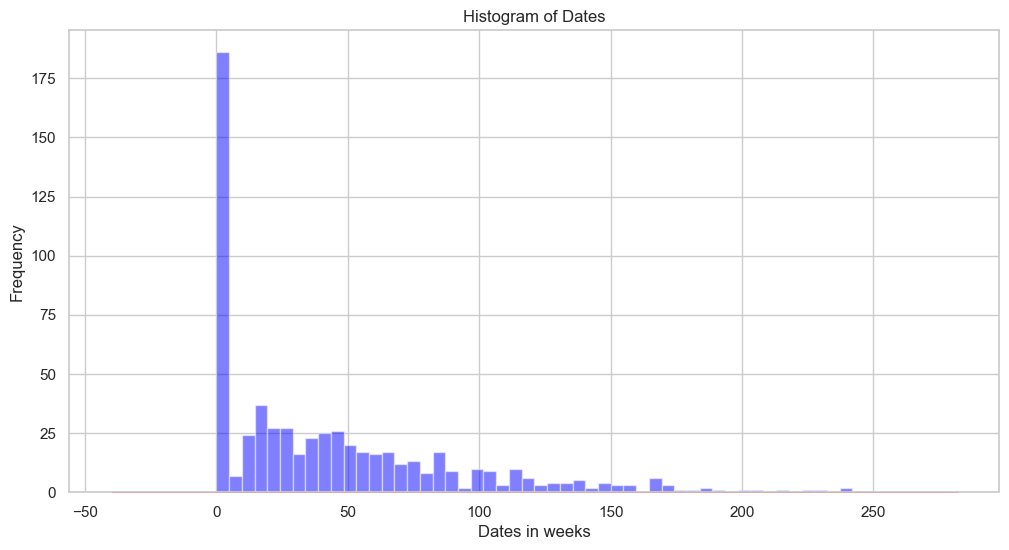

In [151]:
# Extract week numbers as integers
data = [int(week.split('-')[1]) for week in df_rating['Date']]

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a histogram with adjusted bin width and transparency
plt.figure(figsize=(12, 6))
plt.hist(data, bins=50, alpha=0.5, color='blue', label='Histogram')

# Overlay a density plot
sns.kdeplot(data, color='red', label='Density Plot', fill=True)

plt.title('Histogram of Dates')
plt.xlabel('Dates in weeks')
plt.ylabel('Frequency')
plt.show()

C:\Users\aimee\AppData\Local\Temp\ipykernel_18544\1305707157.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_rating, x=column, palette='Set2', ax=axes[i])
C:\Users\aimee\AppData\Local\Temp\ipykernel_18544\1305707157.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_rating, x=column, palette='Set2', ax=axes[i])
C:\Users\aimee\AppData\Local\Temp\ipykernel_18544\1305707157.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_rating, x=column, palette='Set2', ax=axes[i])


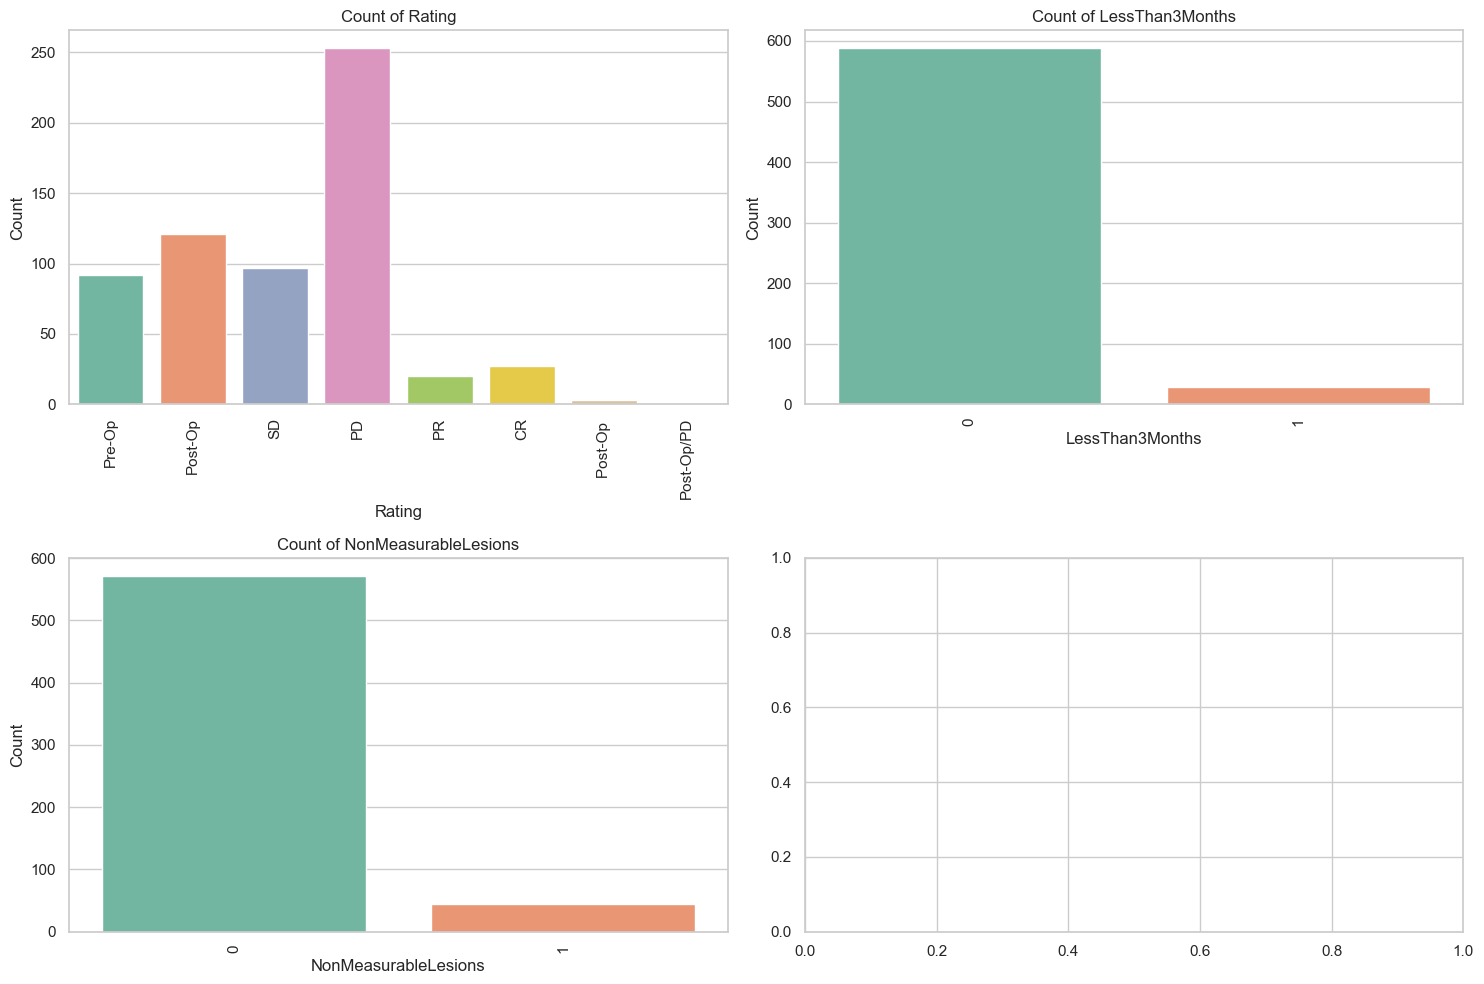

In [155]:
# een barplot voor Rating, Rating rationale, lessTha3Months, NonMeasurableLesions
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
list_columns = ['Rating', 'LessThan3Months', 'NonMeasurableLesions']

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the columns and create count plots
for i, column in enumerate(list_columns):
    sns.countplot(data=df_rating, x=column, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Count of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

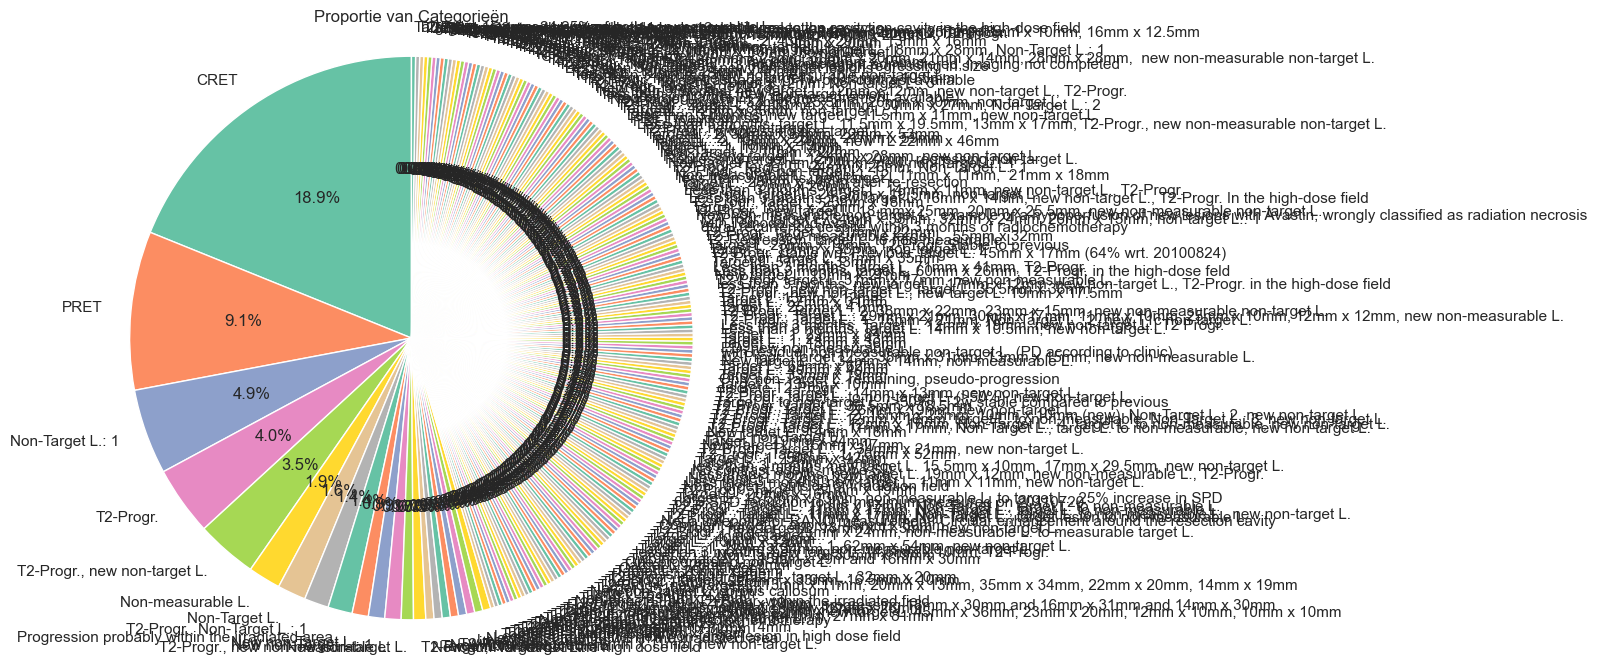

In [156]:
# Bereken de frequenties
# hier moet ik nog iets anders voor verzinnen want dit is super onoverzichtelijk
category_counts = df_rating["Rationale_rating"].value_counts()

# Maak een pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Proportie van Categorieën')
plt.axis('equal')  # Zorg ervoor dat de pie chart rond is
plt.show()

SO rows with non measure lesions have to be deleted

___

## Bivariaat

De data voor de volumes werken met de weeknummers namelijk en sommige zijn leeg dus of de patient eruit halen of de row/folder verwijderen?  
Nan's of na's in bepaalde kolommen zijn ook een probleem, de rijen met deze waarden moeten dus verwijderd worden.  
De data van de volumes zijn in een allemaal aparte mappen en bestanden. Is hier een geautomatiseerde manier voor om de data te verzamelen en te verwerken?  
